## AIM --> To find posterior probablity of each class & maximum is our answer

## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/mushrooms.csv')

In [3]:
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

## Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [6]:
# df.apply means that function will be applied to each column
ds = df.apply(func=le.fit_transform)

In [7]:
ds.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
data = ds.values
X = data[:,1:]
y = data[: ,0]

In [9]:
X.shape , y.shape

((8124, 22), (8124,))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Custom Implementation of Naive Bayes

In [11]:
class CustomNaiveBayes:

    def fit(self,X,y):
        self.X_train = X
        self.y_train = y

    # label is the class for which we want prior-probablity 
    def prior_prob(self,label):
        total = self.y_train.shape[0]
        class_Examples = np.sum(self.y_train==label)
        return class_Examples/float(total)

    # for a single word
    def conditional_prob(self ,feature_col ,feature_val ,label):
        # removing all the X that doesn't belong in that class i.e consists of all examples in class label
        X_filtered  =self.X_train[self.y_train == label]
        numerator = np.sum(X_filtered[: , feature_col] == feature_val)
        denominator = len(X_filtered)
        return numerator/denominator


    # now apply abve func to every word in every single example 
    def predict_pt(self,X_test):
        # X_test is a single example with n features.
        # classes are 0 & 1 in this case
        classes = np.unique(self.y_train)
        # 22 in this case
        n_features = self.X_train.shape[1]


        # post_prb in each class
        # post_prob = prior_prob * likelihood
        post_prob =[]
        for label in classes:
            # initially
            likelihood = 1.0
            for feature in range(n_features):
                conditional = self.conditional_prob(feature ,X_test[feature] , label)
                likelihood*=conditional

            prior =self.prior_prob(label)

            posterior = prior * likelihood
            post_prob.append(posterior)

        # final answer is max value from all labels
        # argmax will return index of the largest value in array
        return np.argmax(post_prob)


    def predict(self ,X_test):
        result = []
        for pt in X_test:
            result.append(self.predict_pt(pt))
        return np.array(result)


    def accuracy(self, X_test ,y_test):
        return (self.predict(X_test) == y_test).mean()


In [12]:
model = CustomNaiveBayes()
model.fit(X_train , y_train)

In [13]:
y_pred = model.predict(X_test)

In [14]:
model.predict(X_test[:10])

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [15]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

## Model Evaluation

In [16]:
from sklearn.metrics import confusion_matrix , accuracy_score
print('Accuracy of model : ',accuracy_score(y_test ,y_pred))

Accuracy of model :  0.9973890339425587


<AxesSubplot:>

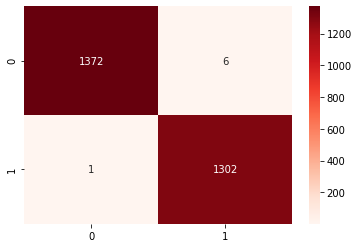

In [17]:
cf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(cf_matrix ,annot=True ,cmap='Reds',fmt='.4g')